<a href="https://colab.research.google.com/github/SergioaA64/SergioaA64/blob/main/08-Trabalho_D6_Estati%CC%81stica_Descritiva_Romualdo_Santos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Trabalho final - Disciplina Estatística Descritiva

Aluno: Romualdo Anselmo dos Santos

Análise das manifestações de ouvidoria realizadas pela plataforma FalaBr (e-OUV) no período de 2015 a 2021.

Objetivo: avaliar a evolução das manifestações classificadas como denúncia e reclamação no âmbito dos cinco maiores órgãos federais com base no orçamento (Ministério da Economia, Ministério da Saúde, Ministério da Cidadania, Ministério da Educação e Ministério da Defesa).

Justificativa: a presente análise faz parte de um conjunto de ações que visam à avaliação da efetividade/impacto do programa "PPA - 4004 - Transparência, Integridade e Combate à Corrupção" (PPA 2020 – 2023)" na melhoria da gestão e redução de irregularidades nas contratações públicas a ser desenvolvido como Trabalho de Conclusão de Curso.

Base de dados utilizada: https://dadosabertos-download.cgu.gov.br/e-Ouv/manifestacoes-ouvidoria.csv

Dados populacionais e de IDH das unidades da federação obtidos nas bases do IBGE e PNUD. 

Descrição das variáveis: Tipo de manifestação; Unidade da federação; Órgão demandado; Ano da manifestação; IDH Estadual; População das UF


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import csv
import seaborn as sns


In [ ]:
# Base de dados das manifestações de ouvidoria (Dados Abertos - FalaBR/e-OUV)


df = pd.read_csv('https://dadosabertos-download.cgu.gov.br/e-Ouv/manifestacoes-ouvidoria.csv', encoding = 'cp1252', sep = ';')
df.head()

,Data Registro,Data Prazo Resposta,Data Resposta,Faixa Etária,Raça/Cor,Gênero,Município Manifestante,UF do Município Manifestante,Município Manifestação,UF do Município Manifestação,Tipo Manifestação,Código Órgão Siorg,Nome Órgão,Assunto,Dias para Resolução,Dias de Atraso,Formulário,Situação,Esfera,Serviço,Outro Serviço,Demanda Atendida,Satisfação
0,03/03/2021,05/05/2021,08/04/2021,Não Informado,Não Informado,Não Informado,Não Informado,NI,CURITIBA,PR,Solicitação,235874.0,Ministério da Cidadania,Não informado,36.0,NaN,Padrão,Concluída,Federal,NaN,NaN,NaN,NaN
1,22/09/2020,22/10/2020,22/09/2020,Não Informado,Não Informado,Masculino,Não Informado,NI,MANAUS,AM,Reclamação,2114.0,Companhia Nacional de Abastecimento,Alimentação Animal,0.0,NaN,Padrão,Concluída,Federal,NaN,NaN,NaN,NaN
2,04/05/2019,05/07/2019,11/06/2019,Não Informado,Não Informado,Masculino,BELO HORIZONTE,MG,BELO HORIZONTE,MG,Reclamação,214460.0,Controladoria-Geral da União,Cobrança de Taxa Pesca Amadora,38.0,NaN,Padrão,Concluída,Federal,NaN,NaN,NaN,NaN
3,29/07/2021,NaN,29/07/2021,Não Informado,Não Informado,Não Informado,Não Informado,NI,SÃO PAULO,SP,Comunicação,32061.0,Conselho de Controle de Atividades Financeiras,Habitação Urbana,0.0,NaN,Denúncia,Concluída,Federal,NaN,NaN,NaN,NaN
4,24/04/2020,26/05/2020,27/04/2020,Não Informado,Não Informado,Masculino,BIRIGUI,SP,BIRIGUI,SP,Denúncia,86144.0,Agência Nacional de Aviação Civil,Aeronáutica,3.0,NaN,Denúncia,Concluída,Federal,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225030 entries, 0 to 2225029
Data columns (total 23 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Data Registro                 object 
 1   Data Prazo Resposta           object 
 2   Data Resposta                 object 
 3   Faixa Etária                  object 
 4   Raça/Cor                      object 
 5   Gênero                        object 
 6   Município Manifestante        object 
 7   UF do Município Manifestante  object 
 8   Município Manifestação        object 
 9   UF do Município Manifestação  object 
 10  Tipo Manifestação             object 
 11  Código Órgão Siorg            float64
 12  Nome Órgão                    object 
 13  Assunto                       object 
 14  Dias para Resolução           float64
 15  Dias de Atraso                float64
 16  Formulário                    object 
 17  Situação                      object 
 18  Esfera                

In [ ]:
df.describe()

,Código Órgão Siorg,Dias para Resolução,Dias de Atraso
count,1.860995e+06,2.130987e+06,73841.000000
mean,1.202194e+05,2.394402e+01,140.772972
std,1.113363e+05,5.282392e+01,299.449520
min,1.000000e+00,0.000000e+00,-54.000000
25%,8.270000e+02,1.000000e+00,-21.000000
50%,9.184200e+04,8.000000e+00,-8.000000
75%,2.358740e+05,2.800000e+01,173.000000
max,9.000060e+05,1.529000e+03,1430.000000


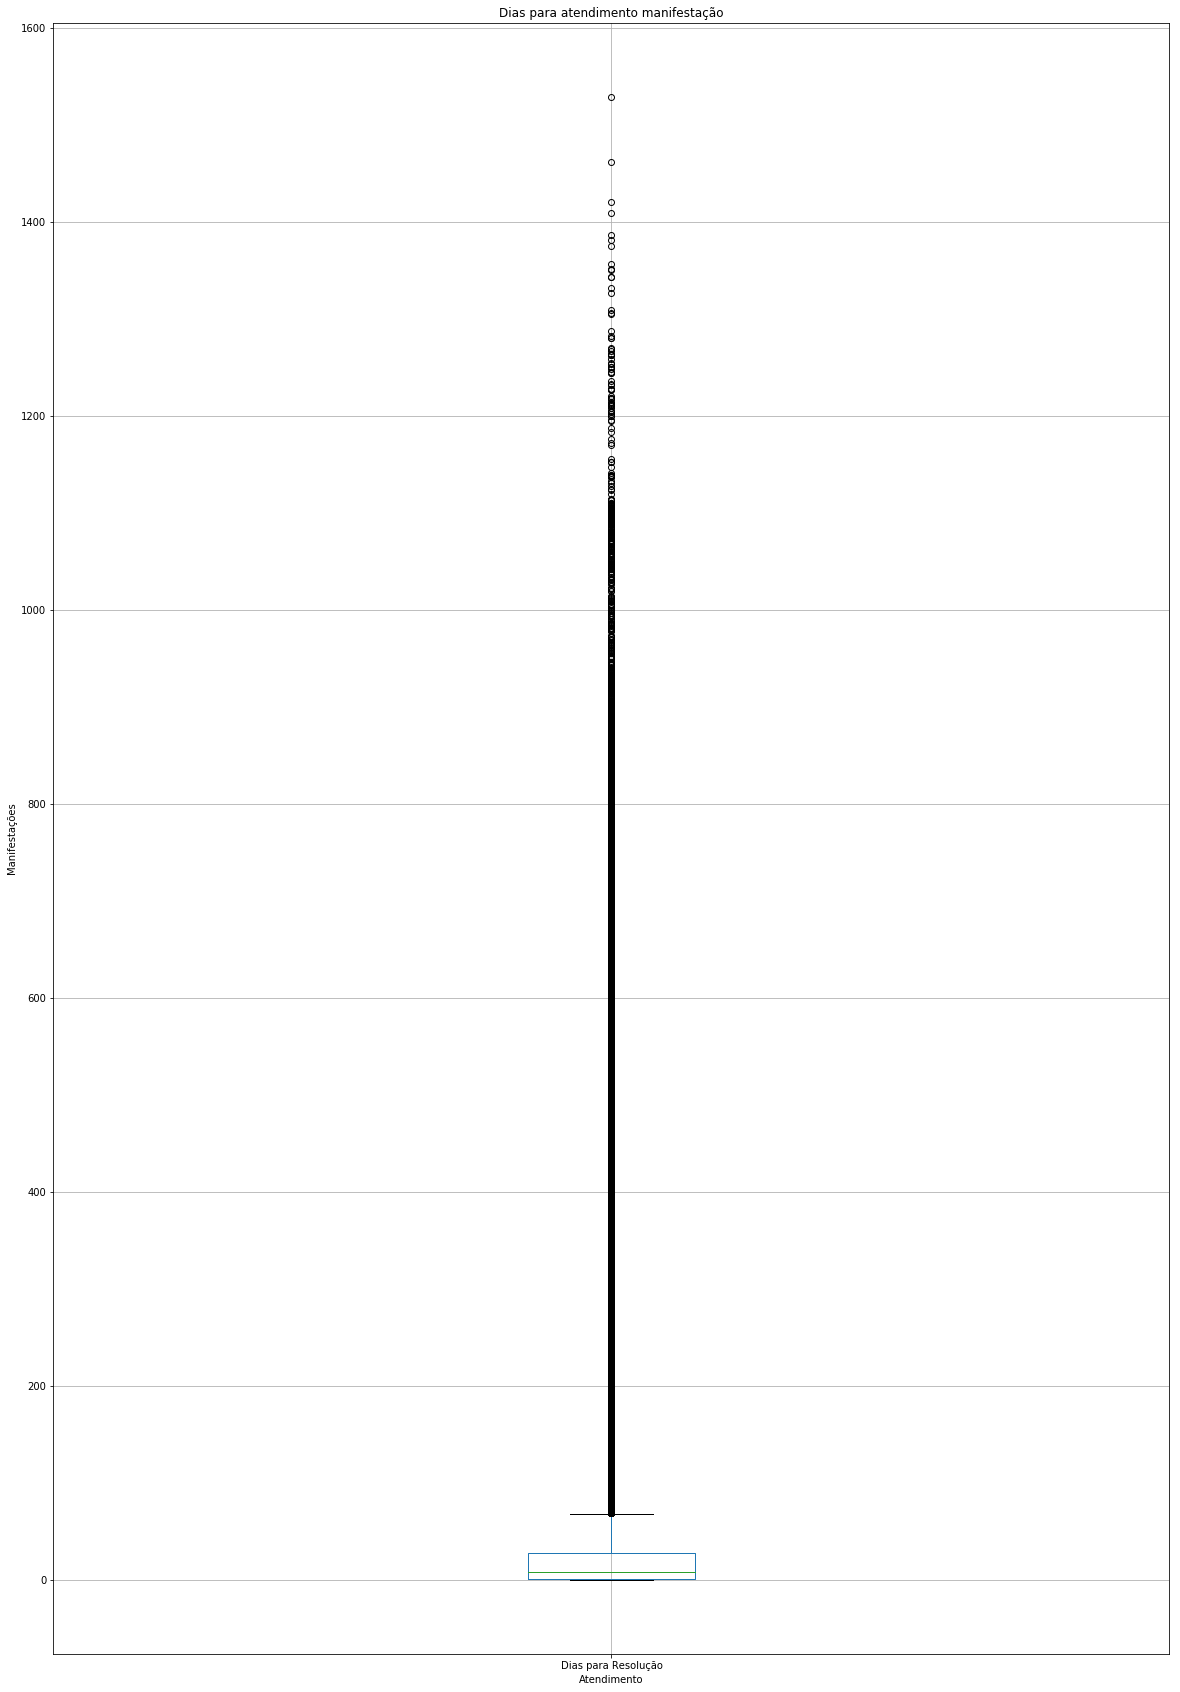

In [ ]:
# Boxplot sobre tempo para atendimento das manifestações


fig = plt.figure(figsize=(20,30))
ax = fig.gca()
df.boxplot(column='Dias para Resolução', ax=ax)
ax.set_title('Dias para atendimento manifestação')
ax.set_xlabel('Atendimento')
ax.set_ylabel('Manifestações')
plt.show()

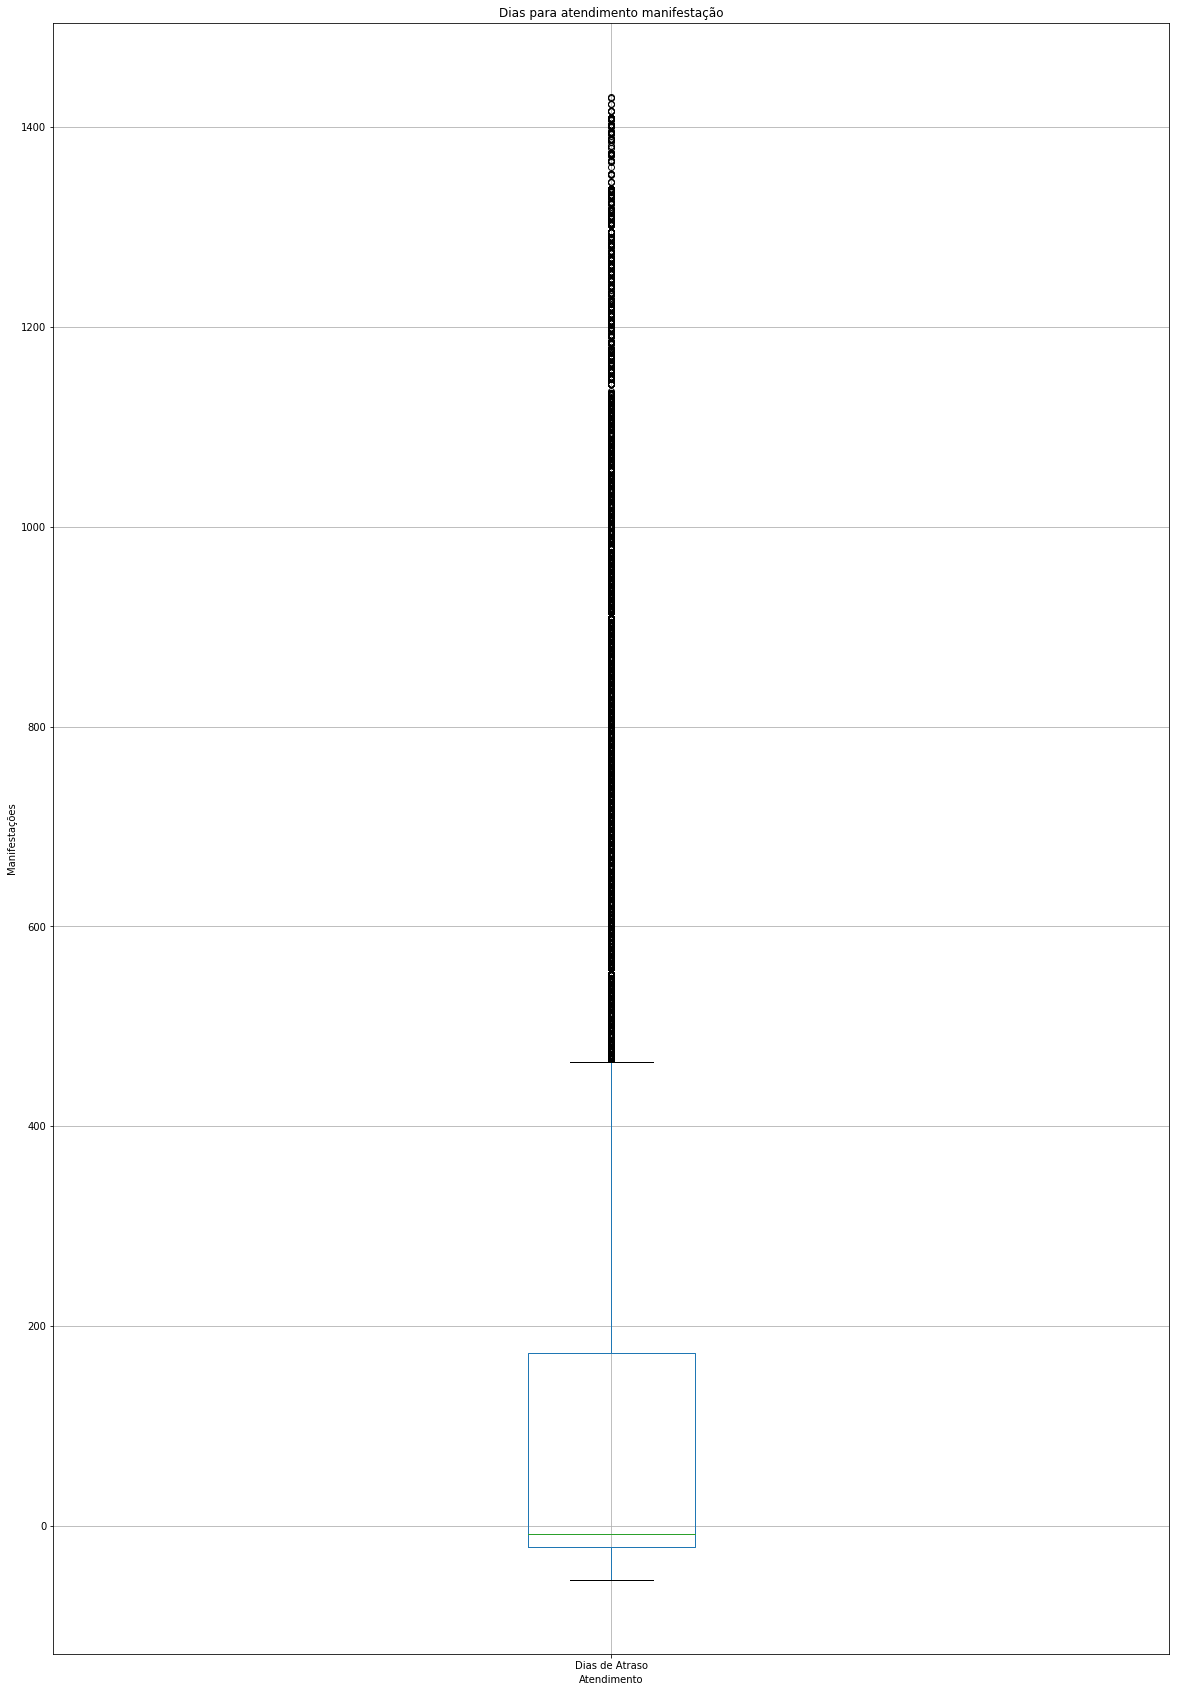

In [ ]:
fig = plt.figure(figsize=(20,30))
ax = fig.gca()
df.boxplot(column='Dias de Atraso', ax=ax)
ax.set_title('Dias para atendimento manifestação')
ax.set_xlabel('Atendimento')
ax.set_ylabel('Manifestações')
plt.show()

In [ ]:
df[['Data Registro','Tipo Manifestação','Nome Órgão','Assunto','Esfera', 'Município Manifestante', 'UF do Município Manifestante']]
df['Data Registro'] = pd.to_datetime(df['Data Registro'], errors='coerce')

In [ ]:
df.groupby(by='Tipo Manifestação').size()

Tipo Manifestação
Comunicação    262608
Denúncia       185937
Elogio          37880
Reclamação     821622
Simplifique       971
Solicitação    874039
Sugestão        41973
dtype: int64

In [ ]:
print(df.columns.values)
df.describe()

['Data Registro' 'Data Prazo Resposta' 'Data Resposta' 'Faixa Etária'
 'Raça/Cor' 'Gênero' 'Município Manifestante'
 'UF do Município Manifestante' 'Município Manifestação'
 'UF do Município Manifestação' 'Tipo Manifestação' 'Código Órgão Siorg'
 'Nome Órgão' 'Assunto' 'Dias para Resolução' 'Dias de Atraso'
 'Formulário' 'Situação' 'Esfera' 'Serviço' 'Outro Serviço'
 'Demanda Atendida' 'Satisfação']


,Código Órgão Siorg,Dias para Resolução,Dias de Atraso
count,1.860995e+06,2.130987e+06,73841.000000
mean,1.202194e+05,2.394402e+01,140.772972
std,1.113363e+05,5.282392e+01,299.449520
min,1.000000e+00,0.000000e+00,-54.000000
25%,8.270000e+02,1.000000e+00,-21.000000
50%,9.184200e+04,8.000000e+00,-8.000000
75%,2.358740e+05,2.800000e+01,173.000000
max,9.000060e+05,1.529000e+03,1430.000000


No handles with labels found to put in legend.


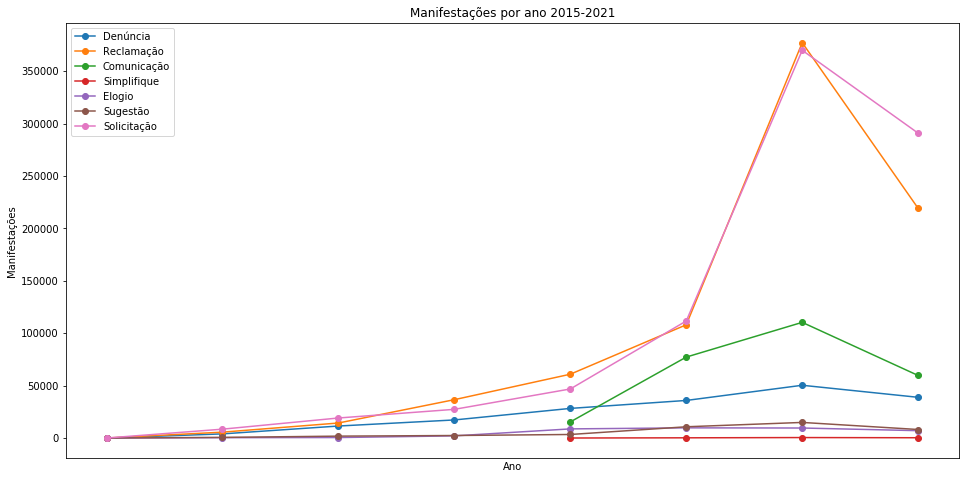

In [ ]:
# Plotagem para acompanhar a evolução comparativa entre os tipos de manifestações no período de 2015 a 2021.

aux = df[df['Tipo Manifestação'].isin(['Denúncia'])]
df_denu = pd.DataFrame()
df_denu['Data Registro'] = aux['Data Registro']
df_denu['Tipo Manifestação'] = aux['Tipo Manifestação']
df_denu['Data Registro'] = df_denu['Data Registro'].dt.year
df_denu = pd.DataFrame(df_denu.groupby('Data Registro')['Tipo Manifestação'].count())

aux = df[df['Tipo Manifestação'].isin(['Reclamação'])]
df_recla = pd.DataFrame()
df_recla['Data Registro'] = aux['Data Registro']
df_recla['Tipo Manifestação'] = aux['Tipo Manifestação']
df_recla['Data Registro'] = df_recla['Data Registro'].dt.year
df_recla = pd.DataFrame(df_recla.groupby('Data Registro')['Tipo Manifestação'].count())

aux = df[df['Tipo Manifestação'].isin(['Comunicação'])]
df_comu = pd.DataFrame()
df_comu['Data Registro'] = aux['Data Registro']
df_comu['Tipo Manifestação'] = aux['Tipo Manifestação']
df_comu['Data Registro'] = df_comu['Data Registro'].dt.year
df_comu = pd.DataFrame(df_comu.groupby('Data Registro')['Tipo Manifestação'].count())

aux = df[df['Tipo Manifestação'].isin(['Simplifique'])]
df_simp = pd.DataFrame()
df_simp['Data Registro'] = aux['Data Registro']
df_simp['Tipo Manifestação'] = aux['Tipo Manifestação']
df_simp['Data Registro'] = df_simp['Data Registro'].dt.year
df_simp = pd.DataFrame(df_simp.groupby('Data Registro')['Tipo Manifestação'].count())

aux = df[df['Tipo Manifestação'].isin(['Elogio'])]
df_elog = pd.DataFrame()
df_elog['Data Registro'] = aux['Data Registro']
df_elog['Tipo Manifestação'] = aux['Tipo Manifestação']
df_elog['Data Registro'] = df_elog['Data Registro'].dt.year
df_elog = pd.DataFrame(df_elog.groupby('Data Registro')['Tipo Manifestação'].count())

aux = df[df['Tipo Manifestação'].isin(['Sugestão'])]
df_suges = pd.DataFrame()
df_suges['Data Registro'] = aux['Data Registro']
df_suges['Tipo Manifestação'] = aux['Tipo Manifestação']
df_suges['Data Registro'] = df_suges['Data Registro'].dt.year
df_suges = pd.DataFrame(df_suges.groupby('Data Registro')['Tipo Manifestação'].count())

aux = df[df['Tipo Manifestação'].isin(['Solicitação'])]
df_solic = pd.DataFrame()
df_solic['Data Registro'] = aux['Data Registro']
df_solic['Tipo Manifestação'] = aux['Tipo Manifestação']
df_solic['Data Registro'] = df_solic['Data Registro'].dt.year
df_solic = pd.DataFrame(df_solic.groupby('Data Registro')['Tipo Manifestação'].count())



x1 = df_denu.index
y1 = df_denu['Tipo Manifestação']

x2 = df_recla.index
y2 = df_recla['Tipo Manifestação']


x3 = df_comu.index
y3 = df_comu['Tipo Manifestação']

x4 = df_simp.index
y4 = df_simp['Tipo Manifestação']

x5 = df_elog.index
y5 = df_elog['Tipo Manifestação']

x6 = df_suges.index
y6 = df_suges['Tipo Manifestação']

x7 = df_solic.index
y7 = df_solic['Tipo Manifestação']


plt.figure(figsize=(16,8))
plt.xlabel('Ano')
plt.ylabel('Manifestações')
plt.title('Manifestações por ano 2015-2021')
plt.xticks(x,df_def.index)
plt.legend(loc='upper left')
plt.plot(x1,y1,marker='o', label='Denúncia')
plt.plot(x2,y2,marker='o', label='Reclamação')
plt.plot(x3,y3,marker='o', label='Comunicação')
plt.plot(x4,y4,marker='o', label='Simplifique')
plt.plot(x5,y5,marker='o', label='Elogio')
plt.plot(x6,y6,marker='o', label='Sugestão')
plt.plot(x7,y7,marker='o', label='Solicitação')

plt.legend(loc='upper left')

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

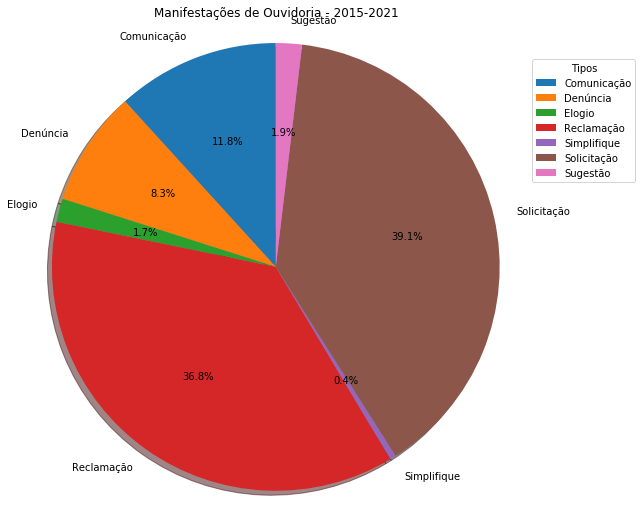

In [ ]:
# criando gráfico por setores (gráfico de pizza), para destacar a participação dos diferentes tipos de manifestações

labels = ['Comunicação','Denúncia','Elogio','Reclamação','Simplifique', 'Solicitação','Sugestão']
sizes = [262608,185937,37880,821622,9716,874039,41973]
fig1, ax1=plt.subplots(figsize=(9, 9))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Manifestações de Ouvidoria - 2015-2021')
ax1.legend(title='Tipos', loc='center left', bbox_to_anchor=(1,0.3,0.5,1))
plt.show


In [ ]:

# dfMan = {"Data Registro","Tipo Manifestação": ["Denúncia", "Reclamação"],"Nome Órgão": ["Ministério da Cidadania", "Ministério da Educação", "Ministério da Saúde", "Ministério da Defesa", "Ministério da Economia"],"Assunto"}
dfMan = pd.DataFrame()
dfMan['Data Registro'] = df['Data Registro']
dfMan['Tipo Manifestação'] = df['Tipo Manifestação']
dfMan['Nome Órgão'] = df['Nome Órgão']
dfMan['Assunto'] = df['Assunto']
dfMan['Esfera'] = df['Esfera']
dfMan['UF do Município Manifestante'] = df['UF do Município Manifestante']
dfMan['Município Manifestante']= df['Município Manifestante']

dfMan = dfMan[dfMan['Tipo Manifestação'].isin(['Denúncia', 'Reclamação']) & dfMan['Nome Órgão'].isin(["Ministério da Cidadania", "Ministério da Educação", "Ministério da Saúde", "Ministério da Defesa", "Ministério da Economia"])]
dfMan.set_index('Data Registro')
dfMan['Data Registro'] = [x[6:] for x in dfMan['Data Registro']]
dfMan['Data Registro'] = pd.to_datetime(dfMan['Data Registro'], errors='coerce')

TypeError: 'Timestamp' object is not subscriptable

Novo dataframe para agrupar as variáveis tipo de manifestação (denúncia e reclamação) em relação aos órgãos.

In [ ]:
dfMan.groupby(by='Tipo Manifestação').size()

Tipo Manifestação
Denúncia       39598
Reclamação    391488
dtype: int64

In [ ]:
dfMan.groupby(by="Nome Órgão").size()

Nome Órgão
Ministério da Cidadania    259139
Ministério da Defesa         2153
Ministério da Economia     145044
Ministério da Educação      18216
Ministério da Saúde          6534
dtype: int64

In [ ]:
dfMan.groupby(by='UF do Município Manifestante').size()

UF do Município Manifestante
AC       384
AL      1368
AM      2208
AP       572
BA     12511
CE      5087
DF      4657
ES      3312
GO      4837
MA      2298
MG     17466
MS      1767
MT      1702
NI    264138
PA      3252
PB      2097
PE      6648
PI      1373
PR      7649
RJ     22417
RN      1857
RO       914
RR       438
RS      6663
SC      4398
SE      1513
SP     48815
TO       745
dtype: int64

In [ ]:
# Criação de dataframe para análise descritiva entre as variáveis UF, IDH Estadual, Número de Municípios, População e Número de manifestações

obj = {'UF': ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ','RN','RO','RR','RS','SC','SE', 'SP','TO']
, 'Numero Manifestacoes':[384, 1368, 2208, 572, 12511, 5087, 4657, 3312, 4837, 2298, 17466, 1767, 1702, 3252, 2097, 6648, 1373, 7649, 22417, 1857, 914, 438, 6663, 4398, 1513, 48815, 745]
, 'Populacao': [906876, 3365351, 4269995, 877613, 14985284, 9240580,3094325,4108508,7206589,7153262,21411923,2839188,3567234,8777124,4059905,9674793,3289290,11597484,17463349,3560903,1815278,652713,11466630,7338473,2338474,46649132,1607363]
, 'Numero de Municipios':[22,102,62,16,417,184,1,78,246,217,853,79,141,144,223,184,224,399,92,167,52,15,497,295,75,645,139]
, 'IDH Estadual': [0.719,0.683,0.733,0.740,0.714,0.735,0.850,0.772,0.769,0.687,0.787,0.766,0.774,0.698,0.722,0.727,0.697,0.792,0.796,0.731,0.725,0.752,0.787,0.808,0.702,0.826,0.743]
}
df_analise = pd.DataFrame(data=obj)
df_analise

,UF,Numero Manifestacoes,Populacao,Numero de Municipios,IDH Estadual
0,AC,384,906876,22,0.719
1,AL,1368,3365351,102,0.683
2,AM,2208,4269995,62,0.733
3,AP,572,877613,16,0.740
4,BA,12511,14985284,417,0.714
5,CE,5087,9240580,184,0.735
6,DF,4657,3094325,1,0.850
7,ES,3312,4108508,78,0.772
8,GO,4837,7206589,246,0.769
9,MA,2298,7153262,217,0.687


In [ ]:
df_analise.describe()

,Numero Manifestacoes,Populacao,Numero de Municipios,IDH Estadual
count,27.000000,2.700000e+01,27.000000,27.000000
mean,6183.259259,7.900653e+06,206.259259,0.749444
std,10011.149521,9.380644e+06,202.814920,0.043379
min,384.000000,6.527130e+05,1.000000,0.683000
25%,1443.000000,2.966756e+06,76.500000,0.720500
50%,2298.000000,4.108508e+06,144.000000,0.740000
75%,5867.500000,9.457686e+06,235.000000,0.780500
max,48815.000000,4.664913e+07,853.000000,0.850000


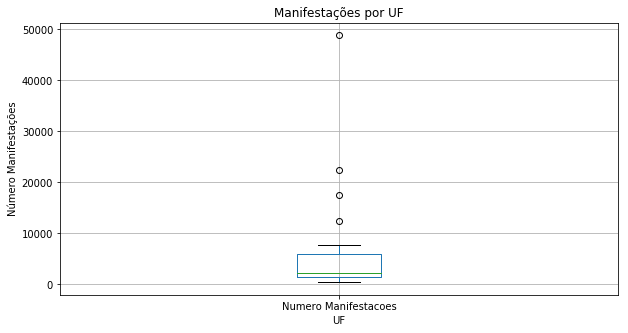

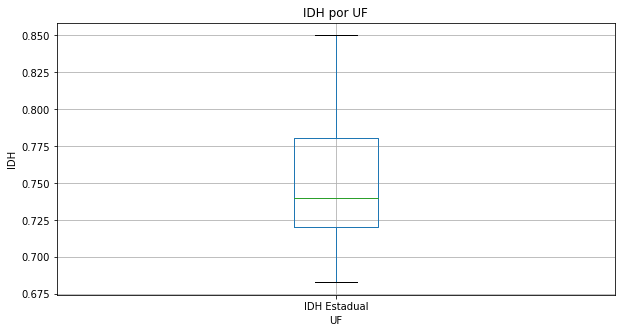

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
df_analise.boxplot(column='Numero Manifestacoes', ax=ax)
ax.set_title('Manifestações por UF')
ax.set_xlabel('UF')
ax.set_ylabel('Número Manifestações')
plt.show()

fig = plt.figure(figsize=(10,5))
ax = fig.gca()
df_analise.boxplot(column='IDH Estadual', ax=ax)
ax.set_title('IDH por UF')
ax.set_xlabel('UF')
ax.set_ylabel('IDH')
plt.show()

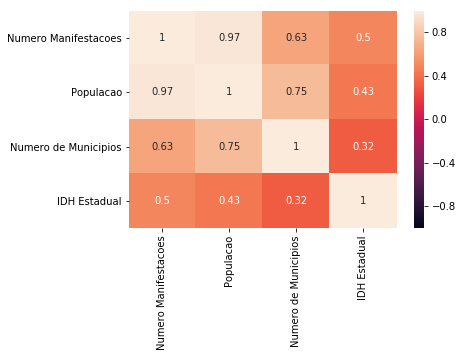

In [ ]:
# Criando mapa de correlação entre as variáveis

sns.heatmap(df_analise.corr(), vmin = -1, vmax = +1, annot = True)

In [ ]:
df_UF = df[['Data Registro','Tipo Manifestação','Esfera','Município Manifestante','UF do Município Manifestação', 'Dias para Resolução', 'Dias de Atraso']].copy()
df_UF['Data Registro'] = pd.to_datetime(df_UF['Data Registro'], errors='coerce')
df_UF.head()

,Data Registro,Tipo Manifestação,Esfera,Município Manifestante,UF do Município Manifestação,Dias para Resolução,Dias de Atraso
0,2021-03-03,Solicitação,Federal,Não Informado,PR,36.0,NaN
1,2020-09-22,Reclamação,Federal,Não Informado,AM,0.0,NaN
2,2019-04-05,Reclamação,Federal,BELO HORIZONTE,MG,38.0,NaN
3,2021-07-29,Comunicação,Federal,Não Informado,SP,0.0,NaN
4,2020-04-24,Denúncia,Federal,BIRIGUI,SP,3.0,NaN


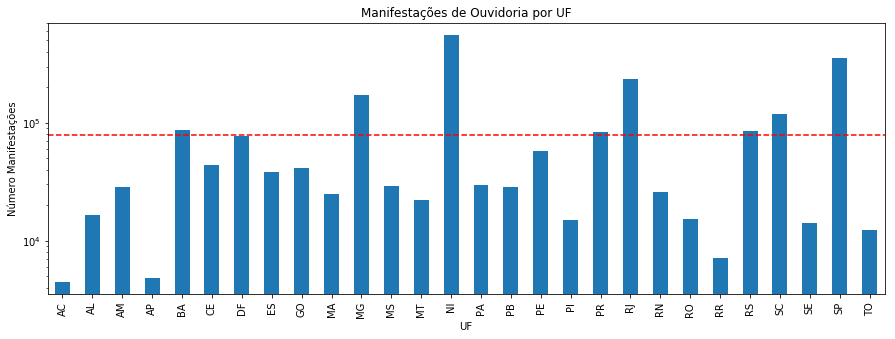

In [ ]:
fig, axs = plt.subplots(figsize=(15, 5))
df_UF.groupby(df_UF['UF do Município Manifestação'])['UF do Município Manifestação'].count().plot.bar()
axs.set_title("Manifestações de Ouvidoria por UF")
axs.set_xlabel("UF")
axs.set_ylabel("Número Manifestações")
plt.yscale('log')
plt.axhline(df.groupby(df_UF['UF do Município Manifestação'])['UF do Município Manifestação'].count().mean(), color='r', linestyle='--', label='média')

plt.show()

In [ ]:
df_UF = df_UF[df_UF['Tipo Manifestação'].isin(['Denúncia', 'Reclamação'])]
df_UF.head()

,Data Registro,Tipo Manifestação,Esfera,UF do Município Manifestação,Dias para Resolução
1,2020-09-22,Reclamação,Federal,AM,0.0
2,2019-04-05,Reclamação,Federal,MG,38.0
4,2020-04-24,Denúncia,Federal,SP,3.0
7,2019-09-08,Reclamação,Federal,NI,19.0
9,2020-06-25,Reclamação,Federal,CE,9.0


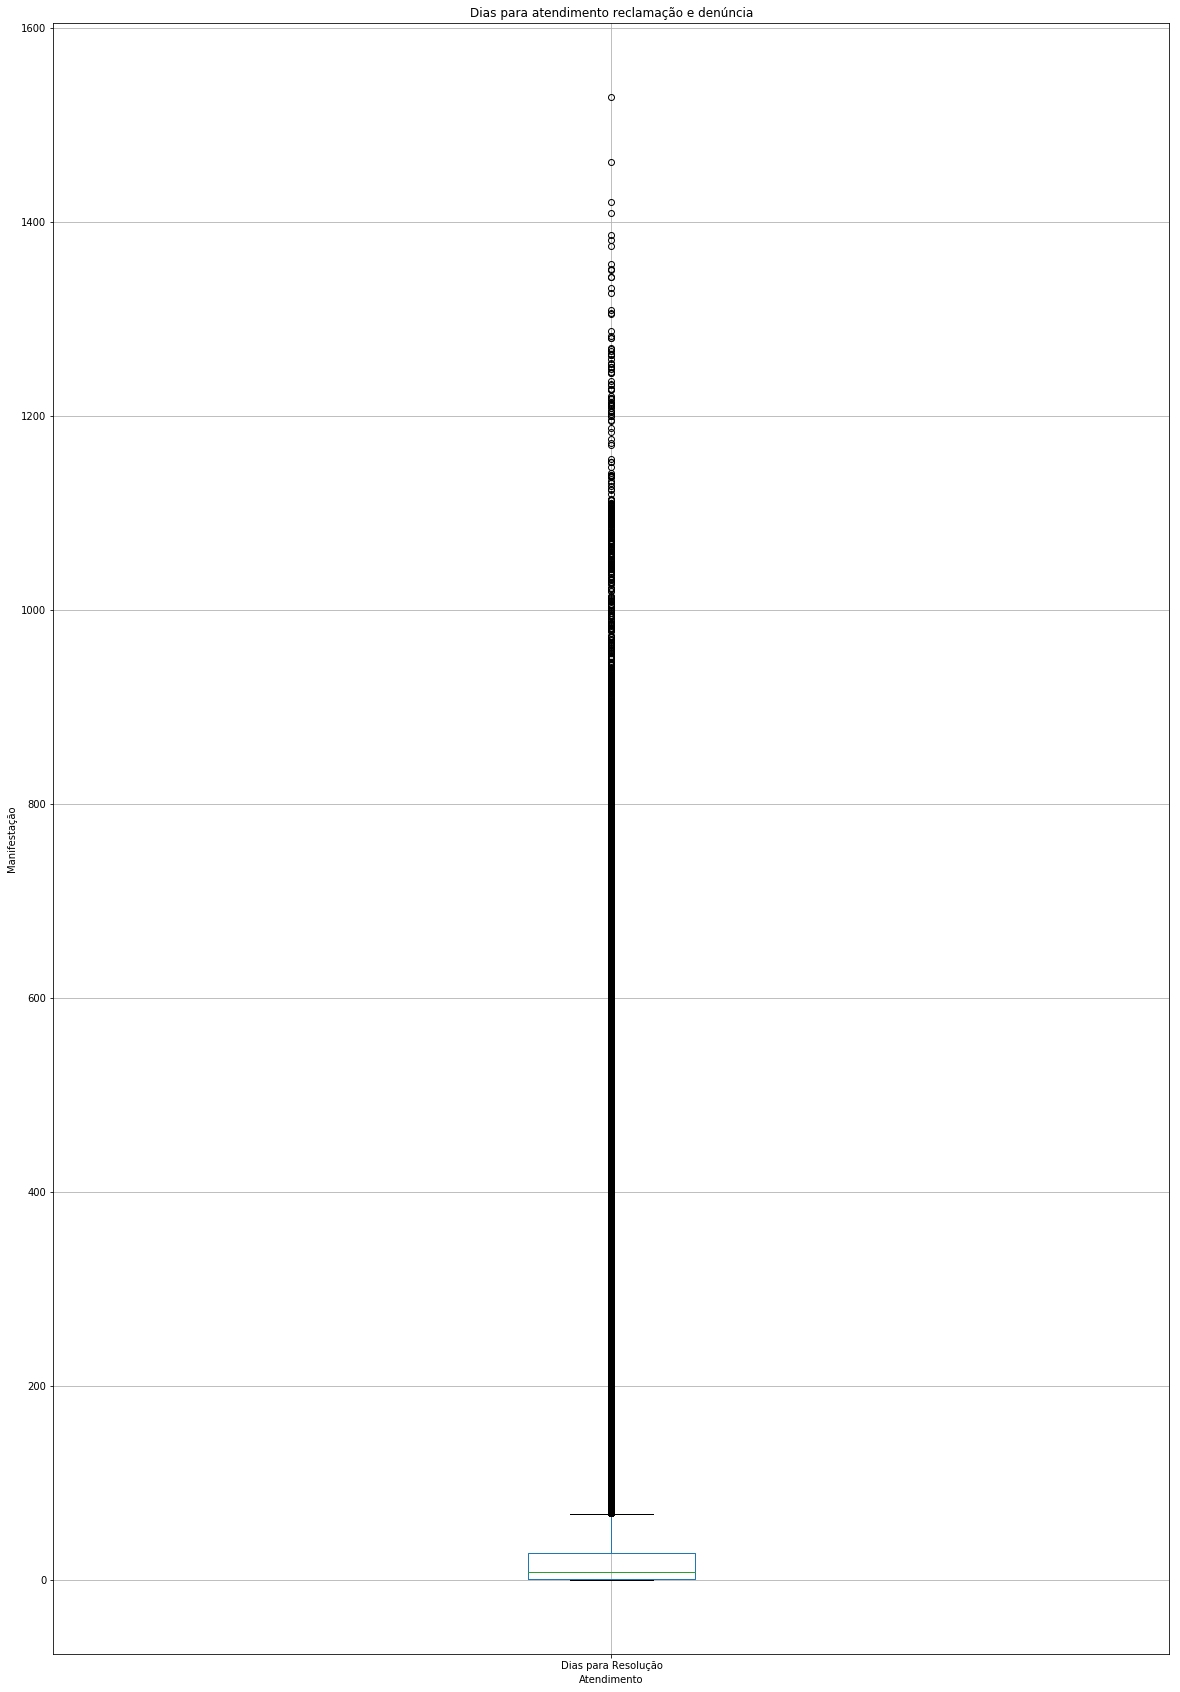

In [ ]:
fig = plt.figure(figsize=(20,30))
ax = fig.gca()
df_UF.boxplot(column='Dias para Resolução', ax=ax)
ax.set_title('Dias para atendimento reclamação e denúncia')
ax.set_xlabel('Atendimento')
ax.set_ylabel('Manifestação')
plt.show()

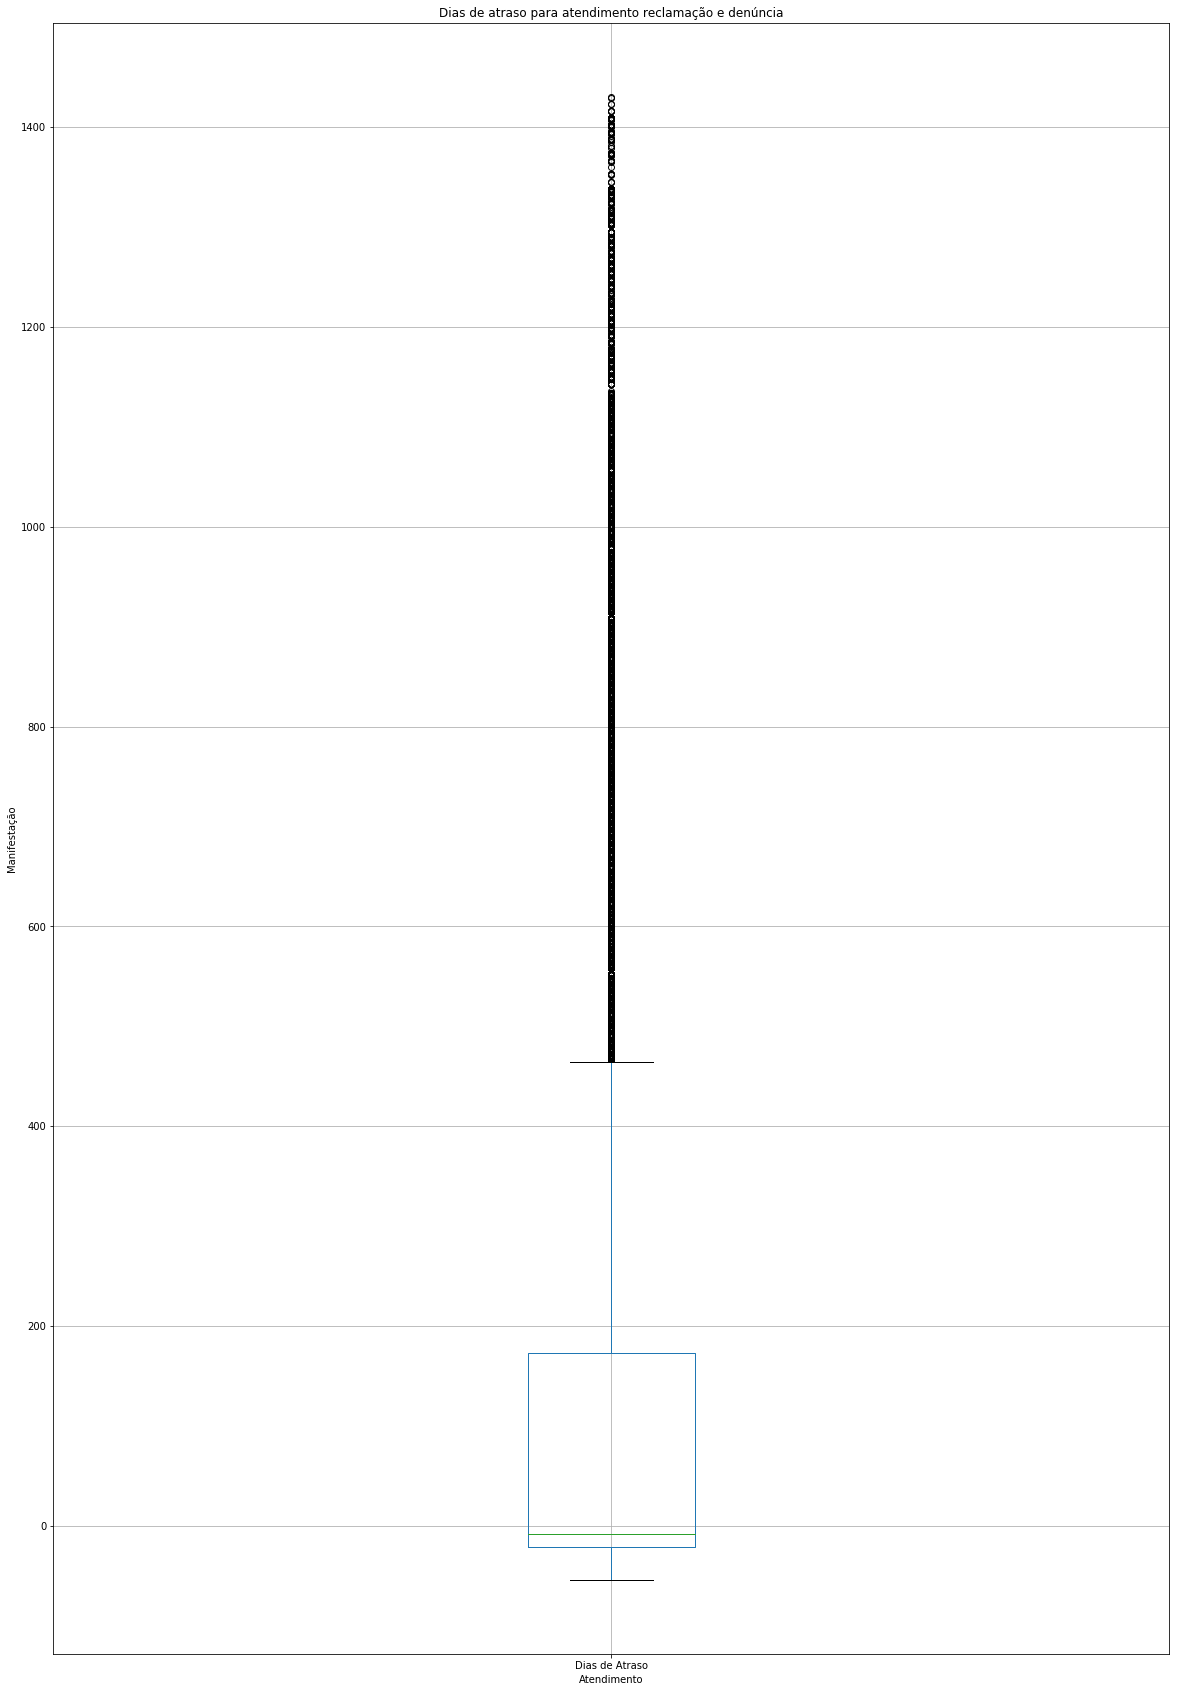

In [ ]:
fig = plt.figure(figsize=(20,30))
ax = fig.gca()
df_UF.boxplot(column='Dias de Atraso', ax=ax)
ax.set_title('Dias de atraso para atendimento reclamação e denúncia')
ax.set_xlabel('Atendimento')
ax.set_ylabel('Manifestação')
plt.show()

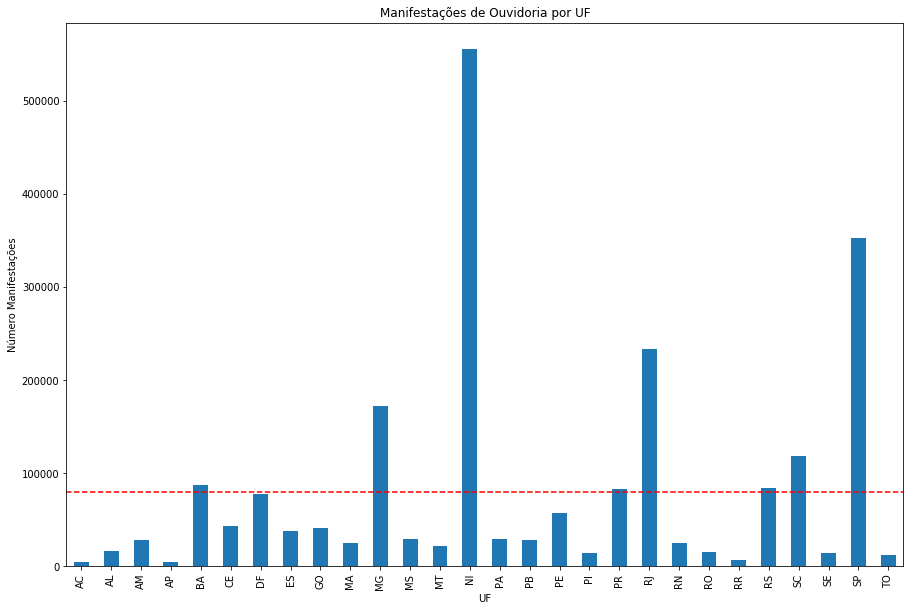

In [ ]:
fig, axs = plt.subplots(figsize=(15, 10))
df_UF.groupby(df_UF['UF do Município Manifestação'])['UF do Município Manifestação'].count().plot.bar()
axs.set_title("Manifestações de Ouvidoria por UF")
axs.set_xlabel("UF")
axs.set_ylabel("Número Manifestações")
# plt.yscale('log')
plt.axhline(df.groupby(df_UF['UF do Município Manifestação'])['UF do Município Manifestação'].count().mean(), color='r', linestyle='--', label='média')

plt.show()

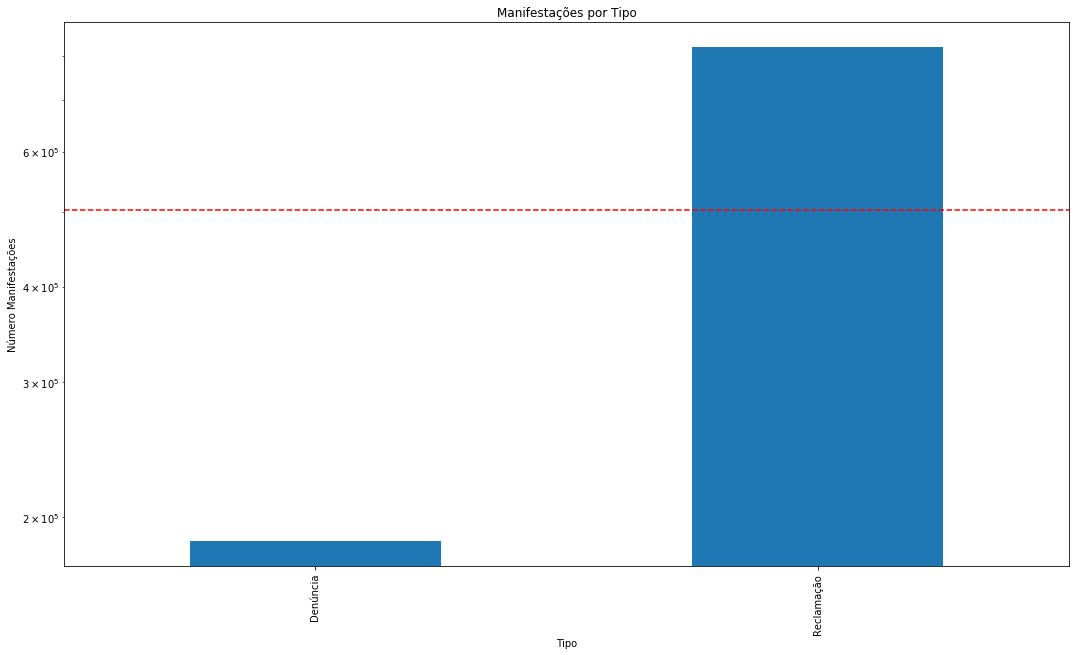

In [ ]:
fig, axs = plt.subplots(figsize=(18, 10))
df_UF.groupby(df_UF['Tipo Manifestação'])['Tipo Manifestação'].count().plot.bar()
axs.set_title("Manifestações por Tipo")
axs.set_xlabel("Tipo")
axs.set_ylabel("Número Manifestações")
plt.yscale('log')
plt.axhline(df.groupby(df_UF['Tipo Manifestação'])['Tipo Manifestação'].count().mean(), color='r', linestyle='--')

plt.show()

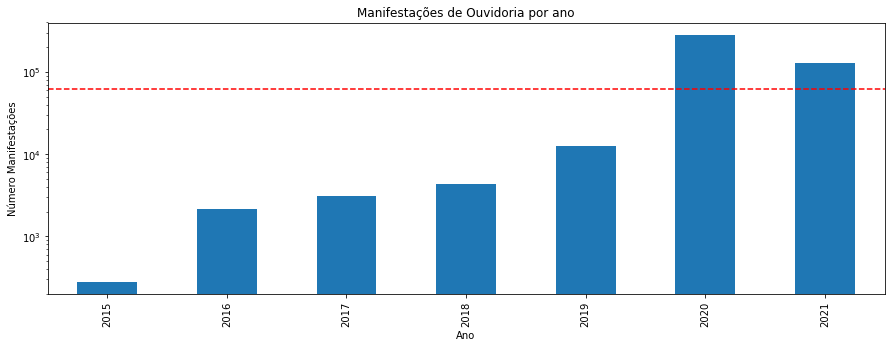

In [ ]:
fig, axs = plt.subplots(figsize=(15, 5))
dfMan.groupby(dfMan['Data Registro'].dt.year)['Data Registro'].count().plot.bar()
axs.set_title("Manifestações de Ouvidoria por ano")
axs.set_xlabel("Ano")
axs.set_ylabel("Número Manifestações")
plt.yscale('log')
plt.axhline(df.groupby(dfMan["Data Registro"].dt.year)['Data Registro'].count().mean(), color='r', linestyle='--', label='média')

plt.show()

In [ ]:


aux = dfMan[dfMan['Nome Órgão'].isin(['Ministério da Cidadania'])]
df_cid = pd.DataFrame()
df_cid['Data Registro'] = aux['Data Registro']
df_cid['Nome Órgão'] = aux['Nome Órgão']
df_cid['Data Registro'] = df_cid['Data Registro'].dt.year
df_cid = pd.DataFrame(df_cid.groupby('Data Registro')['Nome Órgão'].count())

aux = dfMan[dfMan['Nome Órgão'].isin(['Ministério da Economia'])]
df_eco = pd.DataFrame()
df_eco['Data Registro'] = aux['Data Registro']
df_eco['Nome Órgão'] = aux['Nome Órgão']
df_eco['Data Registro'] = df_eco['Data Registro'].dt.year
df_eco = pd.DataFrame(df_eco.groupby('Data Registro')['Nome Órgão'].count())

aux = dfMan[dfMan['Nome Órgão'].isin(['Ministério da Educação'])]
df_edu = pd.DataFrame()
df_edu['Data Registro'] = aux['Data Registro']
df_edu['Nome Órgão'] = aux['Nome Órgão']
df_edu['Data Registro'] = df_edu['Data Registro'].dt.year
df_edu = pd.DataFrame(df_edu.groupby('Data Registro')['Nome Órgão'].count())

aux = dfMan[dfMan['Nome Órgão'].isin(['Ministério da Saúde'])]
df_sau = pd.DataFrame()
df_sau['Data Registro'] = aux['Data Registro']
df_sau['Nome Órgão'] = aux['Nome Órgão']
df_sau['Data Registro'] = df_sau['Data Registro'].dt.year
df_sau = pd.DataFrame(df_sau.groupby('Data Registro')['Nome Órgão'].count())

aux = dfMan[dfMan['Nome Órgão'].isin(['Ministério da Defesa'])]
df_def = pd.DataFrame()
df_def['Data Registro'] = aux['Data Registro']
df_def['Nome Órgão'] = aux['Nome Órgão']
df_def['Data Registro'] = df_def['Data Registro'].dt.year
df_def = pd.DataFrame(df_def.groupby('Data Registro')['Nome Órgão'].count())


aux = dfMan[dfMan['Tipo Manifestação'].isin(['Denúncia'])]
df_denu = pd.DataFrame()
df_denu['Data Registro'] = aux['Data Registro']
df_denu['Tipo Manifestação'] = aux['Tipo Manifestação']
df_denu['Data Registro'] = df_denu['Data Registro'].dt.year
df_denu = pd.DataFrame(df_denu.groupby('Data Registro')['Tipo Manifestação'].count())

aux = dfMan[dfMan['Tipo Manifestação'].isin(['Reclamação'])]
df_recla = pd.DataFrame()
df_recla['Data Registro'] = aux['Data Registro']
df_recla['Tipo Manifestação'] = aux['Tipo Manifestação']
df_recla['Data Registro'] = df_recla['Data Registro'].dt.year
df_recla = pd.DataFrame(df_recla.groupby('Data Registro')['Tipo Manifestação'].count())


No handles with labels found to put in legend.


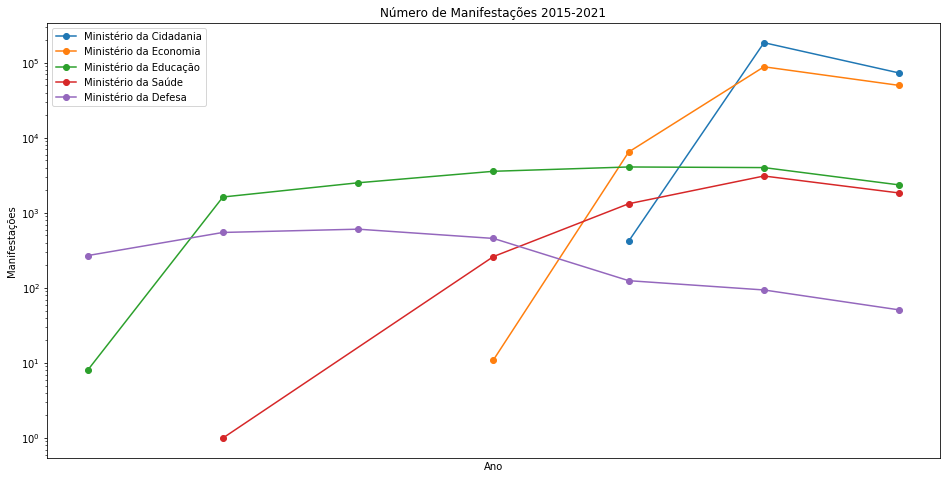

In [ ]:


x1 = df_cid.index
y1 = df_cid['Nome Órgão']

x2 = df_eco.index
y2 = df_eco['Nome Órgão']

x3 = df_edu.index
y3 = df_edu['Nome Órgão']

x4 = df_sau.index
y4 = df_sau['Nome Órgão']

x5 = df_def.index
y5 = df_def['Nome Órgão']

plt.figure(figsize=(16,8))
plt.xlabel('Ano')
plt.ylabel('Manifestações')
plt.title('Número de Manifestações 2015-2021')
plt.xticks(x,df_def.index)
plt.legend(loc='upper left')
plt.plot(x1,y1,marker='o', label='Ministério da Cidadania')
plt.plot(x2,y2,marker='o', label='Ministério da Economia')
plt.plot(x3,y3,marker='o', label='Ministério da Educação')
plt.plot(x4,y4,marker='o', label='Ministério da Saúde')
plt.plot(x5,y5,marker='o', label='Ministério da Defesa')
plt.legend(loc='upper left')
plt.yscale('log')
plt.show()






No handles with labels found to put in legend.


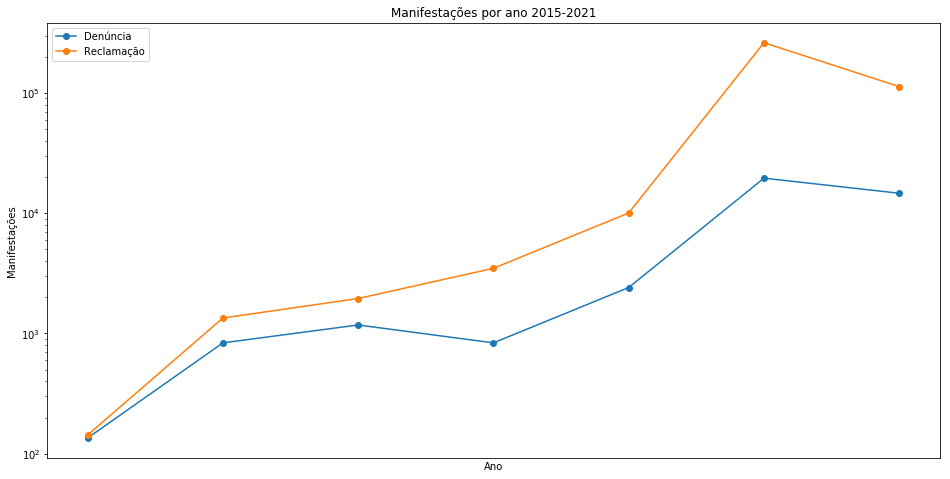

In [ ]:

x1 = df_denu.index
y1 = df_denu['Tipo Manifestação']

x2 = df_recla.index
y2 = df_recla['Tipo Manifestação']


plt.figure(figsize=(16,8))
plt.xlabel('Ano')
plt.ylabel('Manifestações')
plt.title('Manifestações por ano 2015-2021')
plt.xticks(x,df_recla.index)
plt.legend(loc='upper left')
plt.plot(x1,y1,marker='o', label='Denúncia')
plt.plot(x2,y2,marker='o', label='Reclamação')
plt.legend(loc='upper left')
plt.yscale('log')
plt.show()

Conclusões: a) O número de manifestações de ouvidoria evoluiu ao longo da série temporal considerada (2015 a 2021);
            b) Todos os tipos de manifestações apresentaram a tendência, o que pode revelar que os serviços públicos não vem atendendo adequadamente às demandas da sociedade;
            c) As manifestações do tipo reclamação e denúncia representam 48,6% do total o que corrobora a visão de má prestação de serviço e falha nas entregas das políticas públicas;
            d) Houve um pico de crescimento das manifestações no ano de 2020, com destaque para as reclamações, fato que pode ser função da pandemia, quando o governo federal criou o auxílio emergencial;
            e) O governo não tem atendido com tempestividade às manifestações de ouvidoria, os boxplots criados neste trabalho revelam que há um número significativo (outliers) de manifestações com atrasos consideráveis, para além do prazo legal de atendimento (30 dias, prorrogável por mais 30);
            f) A distribuição de manifestções por unidade da federação revela que apenas sete estados estão acima da média nacional;
            g) Há forte correlação (0,97) entre o número de manifestações e a popuação da unidade da federação e uma média correlação (0,5) entre o número de manifestações e o IDH estadual;
            h) Os ministérios com maior orçamento também foram aqueles que receberamo maior número de manifestações, com destaque para os Ministérios da Cidadania e da Economia;
            i) Os dados das manifestações de ouvidoria podem colaborar para a avaliação da gestão de políticas públicas e identificar o comportamento da sociedade.